### Split dataset - Run only once to split dataset

In [2]:
from DeezyMatch.data_processing import m_split_dataset

train, valid, test = m_split_dataset(dataset_path="./dataset/dataset-unfiltered.txt", 
                                    train_prop=0.7, 
                                    val_prop=0.15, 
                                    test_prop=0.15, 
                                    csv_sep="\t")
print("Train: ", len(train))
print("Valid: ", len(valid))
print("Test: ", len(test))

Train:  385023
Valid:  82504
Test:  82504


In [1]:
from DeezyMatch import train as dm_train

model_name="transformer_test"

# train a new model
dm_train(input_file_path="./inputs/input_dfm_rnn.yaml", 
         dataset_path="./dataset/wikidata-test.txt", 
         model_name=model_name)
         

2022-08-09 17:56:34 HOANG-MINH-LAPTOP [INFO] read input file: ./inputs/input_dfm_rnn.yaml
2022-08-09 17:56:34 HOANG-MINH-LAPTOP [INFO] pytorch will use: cuda
2022-08-09 17:56:34 HOANG-MINH-LAPTOP [INFO] read CSV file: ./dataset/wikidata-test.txt
2022-08-09 17:56:35 HOANG-MINH-LAPTOP [INFO] number of labels, True: 7005 and False: 7006
2022-08-09 17:56:35 HOANG-MINH-LAPTOP [INFO] Splitting the Dataset
2022-08-09 17:56:35 HOANG-MINH-LAPTOP [INFO] finish splitting the Dataset. User time: 0.03601479530334473
2022-08-09 17:56:35 HOANG-MINH-LAPTOP [INFO] splits are as follow:
train    9809
test     2102
val      2100
Name: split, dtype: int64
2022-08-09 17:56:35 HOANG-MINH-LAPTOP [INFO] start creating a lookup table and convert characters to indices
2022-08-09 17:56:35 HOANG-MINH-LAPTOP [INFO] -- create vocabulary
2022-08-09 17:56:36 HOANG-MINH-LAPTOP [INFO] -- convert tokens to indices
2022-08-09 17:56:36 HOANG-MINH-LAPTOP [INFO] -- create a lookup table for tokens
2022-08-09 17:56:36 HOANG-




2022-08-09 17:56:37 HOANG-MINH-LAPTOP [INFO] ******************************
2022-08-09 17:56:37 HOANG-MINH-LAPTOP [INFO] **** (Bi-directional) GRU ****
2022-08-09 17:56:37 HOANG-MINH-LAPTOP [INFO] ******************************
2022-08-09 17:56:37 HOANG-MINH-LAPTOP [INFO] read inputs
2022-08-09 17:56:41 HOANG-MINH-LAPTOP [INFO] start fitting parameters
2022-08-09 17:56:41 HOANG-MINH-LAPTOP [INFO] Number of batches: 39
2022-08-09 17:56:41 HOANG-MINH-LAPTOP [INFO] Number of epochs: 10


  0%|          | 0/10 [00:00<?, ?it/s]




Total number of params: 2599482

two_parallel_transformer (
  (dropout): Dropout(p=0.01, inplace=False), weights=(), parameters=0
  (word_embedding): Embedding(37040, 64), weights=((37040, 64),), parameters=2370560
  (positional_embedding): Embedding(50, 64), weights=((50, 64),), parameters=3200
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=120, bias=True)
        (dropout): Dropout(p=0, inplace=False)
        (linear2): Linear(in_features=120, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0, inplace=False)
        (dropout2): Dropout(p=0, inplace=False)
      )
      (1): Transfor

2022-08-09 17:56:55 HOANG-MINH-LAPTOP [INFO] 08/09/2022_17:56:55 -- Epoch: 1/10; Train; loss: 0.713; acc: 0.494; precision: 0.493, recall: 0.458, macrof1: 0.493, weightedf1: 0.493


C:\Users\ASUS TK\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2022-08-09 17:56:56 HOANG-MINH-LAPTOP [INFO] 08/09/2022_17:56:56 -- Epoch: 1/10; Valid; loss: 0.695; acc: 0.500; precision: 0.000, recall: 0.000, macrof1: 0.333, weightedf1: 0.333
2022-08-09 17:56:56 HOANG-MINH-LAPTOP [INFO] saving the model


KeyboardInterrupt: 

output_name: t001
Time: 1739s
output_name: t001
Time / epoch: 434.750s
Epoch: 4, Loss: 0.099
Epoch: 4, macro F1: 0.967
Epoch: 4, Acc: 0.967
Epoch: 4, Prec/Recall: 0.977/0.957


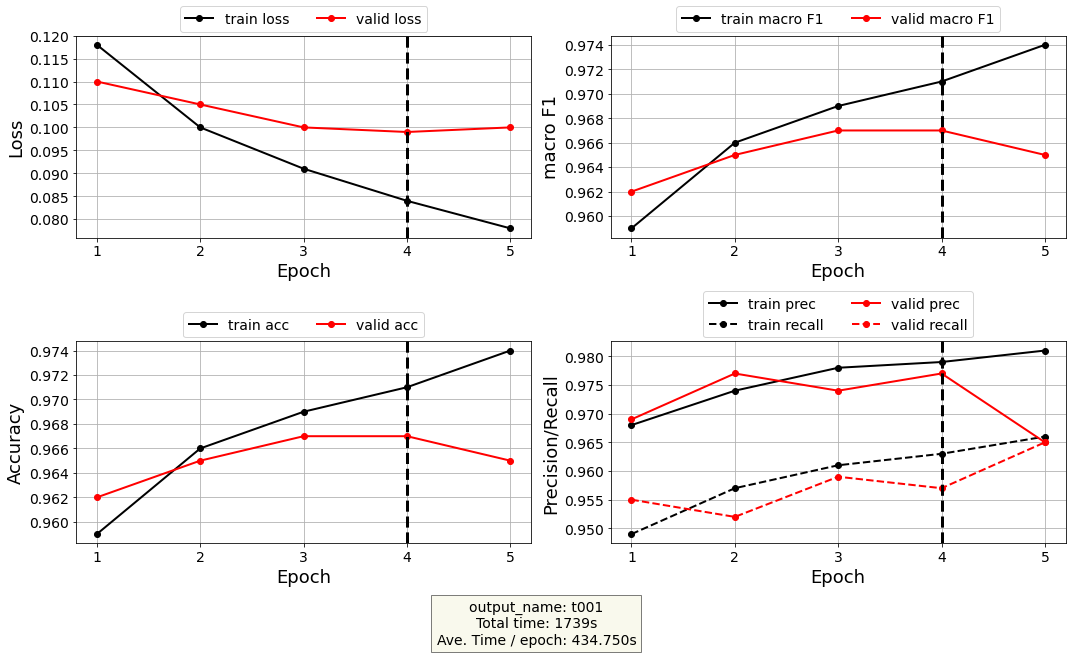

In [1]:
from DeezyMatch import plot_log

# plot log file
plot_log(path2log="./models/" + "ft_trans_ulan_fc_then_trans_fc" + "/log.txt", 
         output_name="t001")

### Fine-tuning 

In [1]:
from DeezyMatch import finetune as dm_finetune

# fine-tune a pretrained model stored at pretrained_model_path and pretrained_vocab_path 
dm_finetune(input_file_path="./models/transformer_23072022/input_dfm_rnn.yaml", 
            dataset_path="./dataset/ulan.txt", 
            model_name="transss",
            pretrained_model_path="./models/transformer_23072022/transformer_23072022.model", 
            pretrained_vocab_path="./models/transformer_23072022/transformer_23072022.vocab")

2022-08-14 07:17:14 HOANG-MINH-LAPTOP [INFO] read input file: ./models/transformer_23072022/input_dfm_rnn.yaml
2022-08-14 07:17:16 HOANG-MINH-LAPTOP [INFO] pytorch will use: cuda
2022-08-14 07:17:16 HOANG-MINH-LAPTOP [INFO] read CSV file: ./dataset/ulan.txt
2022-08-14 07:17:21 HOANG-MINH-LAPTOP [INFO] number of labels, True: 275016 and False: 275015
2022-08-14 07:17:21 HOANG-MINH-LAPTOP [INFO] Splitting the Dataset
2022-08-14 07:17:21 HOANG-MINH-LAPTOP [INFO] finish splitting the Dataset. User time: 0.5067436695098877
2022-08-14 07:17:22 HOANG-MINH-LAPTOP [INFO] splits are as follow:
train    385021
test      82506
val       82504
Name: split, dtype: int64
2022-08-14 07:17:22 HOANG-MINH-LAPTOP [INFO] start creating a lookup table and convert characters to indices
2022-08-14 07:17:22 HOANG-MINH-LAPTOP [INFO] -- create vocabulary
2022-08-14 07:18:33 HOANG-MINH-LAPTOP [INFO] -- convert tokens to indices
546444 [4648, 7507, 1527, 6734, 3116, 795, 4521, 306, 75009, 590646] ['<', '張', '帆', '



List all parameters in the model
word_embedding.weight False
positional_embedding.weight False
transformer.layers.0.self_attn.in_proj_weight True
transformer.layers.0.self_attn.in_proj_bias True
transformer.layers.0.self_attn.out_proj.weight True
transformer.layers.0.self_attn.out_proj.bias True
transformer.layers.0.linear1.weight True
transformer.layers.0.linear1.bias True
transformer.layers.0.linear2.weight True
transformer.layers.0.linear2.bias True
transformer.layers.0.norm1.weight True
transformer.layers.0.norm1.bias True
transformer.layers.0.norm2.weight True
transformer.layers.0.norm2.bias True
transformer.layers.1.self_attn.in_proj_weight True
transformer.layers.1.self_attn.in_proj_bias True
transformer.layers.1.self_attn.out_proj.weight True
transformer.layers.1.self_attn.out_proj.bias True
transformer.layers.1.linear1.weight True
transformer.layers.1.linear1.bias True
transformer.layers.1.linear2.weight True
transformer.layers.1.linear2.bias True
transformer.layers.1.norm1.

  0%|          | 0/5 [00:08<?, ?it/s]




Total number of params: 61004794

two_parallel_transformer (
  (dropout): Dropout(p=0.01, inplace=False), weights=(), parameters=0
  (word_embedding): Embedding(949623, 64), weights=((949623, 64),), parameters=60775872
  (positional_embedding): Embedding(50, 64), weights=((50, 64),), parameters=3200
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=120, bias=True)
        (dropout): Dropout(p=0, inplace=False)
        (linear2): Linear(in_features=120, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0, inplace=False)
        (dropout2): Dropout(p=0, inplace=False)
      )
      (1): Tran

2022-08-14 07:36:32 HOANG-MINH-LAPTOP [INFO] 08/14/2022_07:36:32 -- Epoch: 1/5; Train; loss: 0.128; acc: 0.955; precision: 0.965, recall: 0.944, macrof1: 0.955, weightedf1: 0.955


2022-08-14 07:38:17 HOANG-MINH-LAPTOP [INFO] 08/14/2022_07:38:17 -- Epoch: 1/5; Valid; loss: 0.112; acc: 0.962; precision: 0.977, recall: 0.947, macrof1: 0.962, weightedf1: 0.962
2022-08-14 07:38:18 HOANG-MINH-LAPTOP [INFO] saving the model


2022-08-14 07:44:44 HOANG-MINH-LAPTOP [INFO] 08/14/2022_07:44:44 -- Epoch: 2/5; Train; loss: 0.103; acc: 0.964; precision: 0.973, recall: 0.955, macrof1: 0.964, weightedf1: 0.964


2022-08-14 07:45:21 HOANG-MINH-LAPTOP [INFO] 08/14/2022_07:45:21 -- Epoch: 2/5; Valid; loss: 0.106; acc: 0.965; precision: 0.981, recall: 0.947, macrof1: 0.965, weightedf1: 0.965
2022-08-14 07:45:21 HOANG-MINH-LAPTOP [INFO] saving the model


2022-08-14 07:51:43 HOANG-MINH-LAPTOP [INFO] 08/14/2022_07:51:43 -- Epoch: 3/5; Train; loss: 0.093; acc: 0.968; precision: 0.977, recall: 0.960, macrof1: 0.968, weightedf1: 0.968


2022-08-14 07:52:20 HOANG-MINH-LAPTOP [INFO] 08/14/2022_07:52:20 -- Epoch: 3/5; Valid; loss: 0.101; acc: 0.966; precision: 0.977, recall: 0.954, macrof1: 0.966, weightedf1: 0.966
2022-08-14 07:52:20 HOANG-MINH-LAPTOP [INFO] saving the model


2022-08-14 07:58:46 HOANG-MINH-LAPTOP [INFO] 08/14/2022_07:58:46 -- Epoch: 4/5; Train; loss: 0.086; acc: 0.971; precision: 0.978, recall: 0.962, macrof1: 0.971, weightedf1: 0.971


2022-08-14 07:59:24 HOANG-MINH-LAPTOP [INFO] 08/14/2022_07:59:24 -- Epoch: 4/5; Valid; loss: 0.102; acc: 0.966; precision: 0.983, recall: 0.949, macrof1: 0.966, weightedf1: 0.966
2022-08-14 07:59:24 HOANG-MINH-LAPTOP [INFO] saving the model


2022-08-14 08:05:54 HOANG-MINH-LAPTOP [INFO] 08/14/2022_08:05:54 -- Epoch: 5/5; Train; loss: 0.079; acc: 0.973; precision: 0.981, recall: 0.965, macrof1: 0.973, weightedf1: 0.973


2022-08-14 08:06:32 HOANG-MINH-LAPTOP [INFO] 08/14/2022_08:06:32 -- Epoch: 5/5; Valid; loss: 0.098; acc: 0.968; precision: 0.979, recall: 0.957, macrof1: 0.968, weightedf1: 0.968
2022-08-14 08:06:32 HOANG-MINH-LAPTOP [INFO] saving the model
2022-08-14 08:06:37 HOANG-MINH-LAPTOP [INFO] saving the model with least valid loss (checkpoint: 5) at ./models\transss\transss.model



User time: 2419.7505


output_name: log_t001
Time: 1762s
output_name: log_t001
Time / epoch: 440.500s
Epoch: 5, Loss: 0.098
Epoch: 5, macro F1: 0.968
Epoch: 5, Acc: 0.968
Epoch: 5, Prec/Recall: 0.979/0.957


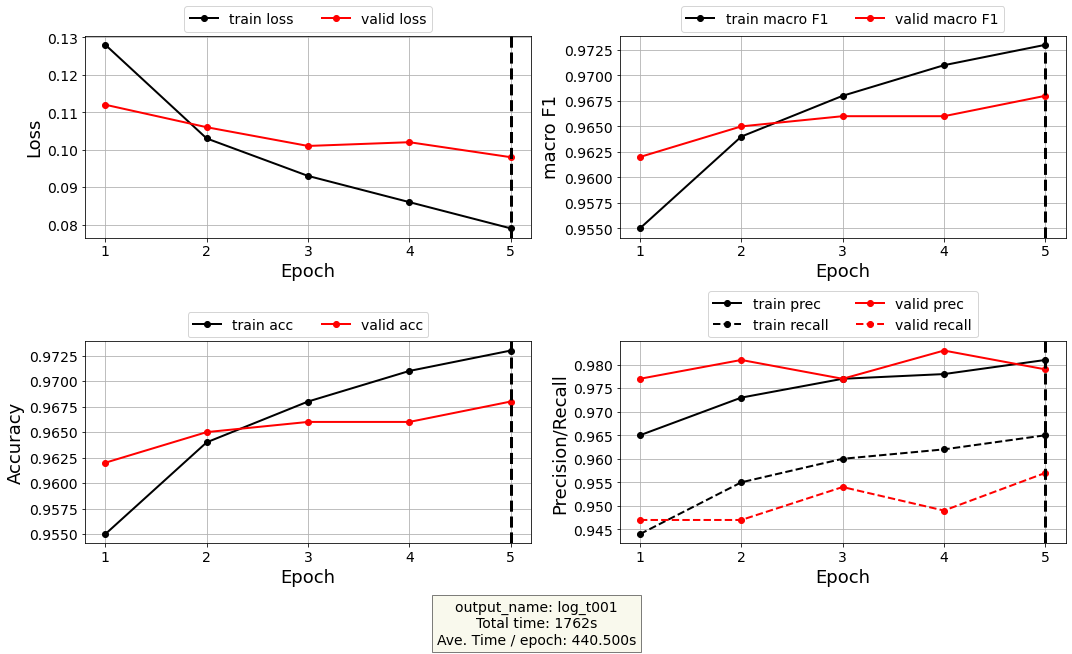

In [2]:
from DeezyMatch import plot_log

# plot log file
plot_log(path2log="./models/" + "transss" + "/log.txt", 
         output_name="log_t001")

In [4]:
dm_finetune(input_file_path="./inputs/input_dfm_rnn.yaml", 
            dataset_path="./dataset/ulan.txt", 
            model_name="ft_trans_ulan_fc_then_trans_fc",
            pretrained_model_path="./models/ft_trans_ulan_only_fc/ft_trans_ulan_only_fc.model", 
            pretrained_vocab_path="./models/ft_trans_ulan_only_fc/ft_trans_ulan_only_fc.vocab")

2022-08-10 11:07:06 HOANG-MINH-LAPTOP [INFO] read input file: ./inputs/input_dfm_rnn.yaml
2022-08-10 11:07:07 HOANG-MINH-LAPTOP [INFO] pytorch will use: cuda
2022-08-10 11:07:07 HOANG-MINH-LAPTOP [INFO] read CSV file: ./dataset/ulan.txt
2022-08-10 11:07:19 HOANG-MINH-LAPTOP [INFO] number of labels, True: 275016 and False: 275015
2022-08-10 11:07:19 HOANG-MINH-LAPTOP [INFO] Splitting the Dataset
2022-08-10 11:07:19 HOANG-MINH-LAPTOP [INFO] finish splitting the Dataset. User time: 0.5749289989471436
2022-08-10 11:07:19 HOANG-MINH-LAPTOP [INFO] splits are as follow:
train    385021
test      82506
val       82504
Name: split, dtype: int64
2022-08-10 11:07:19 HOANG-MINH-LAPTOP [INFO] start creating a lookup table and convert characters to indices
2022-08-10 11:07:20 HOANG-MINH-LAPTOP [INFO] -- create vocabulary
2022-08-10 11:10:18 HOANG-MINH-LAPTOP [INFO] -- convert tokens to indices
546444 [4648, 7507, 1527, 6734, 3116, 795, 4521, 306, 75009, 590646] ['<', '張', '帆', '銅', '版', '畫', '展', '>



List all parameters in the model
word_embedding.weight False
positional_embedding.weight False
transformer.layers.0.self_attn.in_proj_weight True
transformer.layers.0.self_attn.in_proj_bias True
transformer.layers.0.self_attn.out_proj.weight True
transformer.layers.0.self_attn.out_proj.bias True
transformer.layers.0.linear1.weight True
transformer.layers.0.linear1.bias True
transformer.layers.0.linear2.weight True
transformer.layers.0.linear2.bias True
transformer.layers.0.norm1.weight True
transformer.layers.0.norm1.bias True
transformer.layers.0.norm2.weight True
transformer.layers.0.norm2.bias True
transformer.layers.1.self_attn.in_proj_weight True
transformer.layers.1.self_attn.in_proj_bias True
transformer.layers.1.self_attn.out_proj.weight True
transformer.layers.1.self_attn.out_proj.bias True
transformer.layers.1.linear1.weight True
transformer.layers.1.linear1.bias True
transformer.layers.1.linear2.weight True
transformer.layers.1.linear2.bias True
transformer.layers.1.norm1.

  0%|          | 0/5 [00:05<?, ?it/s]




Total number of params: 61004794

two_parallel_transformer (
  (dropout): Dropout(p=0.01, inplace=False), weights=(), parameters=0
  (word_embedding): Embedding(949623, 64), weights=((949623, 64),), parameters=60775872
  (positional_embedding): Embedding(50, 64), weights=((50, 64),), parameters=3200
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0): TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=120, bias=True)
        (dropout): Dropout(p=0, inplace=False)
        (linear2): Linear(in_features=120, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0, inplace=False)
        (dropout2): Dropout(p=0, inplace=False)
      )
      (1): Tran

2022-08-10 11:26:49 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:26:49 -- Epoch: 1/5; Train; loss: 0.118; acc: 0.959; precision: 0.968, recall: 0.949, macrof1: 0.959, weightedf1: 0.959


2022-08-10 11:27:32 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:27:32 -- Epoch: 1/5; Valid; loss: 0.110; acc: 0.962; precision: 0.969, recall: 0.955, macrof1: 0.962, weightedf1: 0.962
2022-08-10 11:27:33 HOANG-MINH-LAPTOP [INFO] saving the model


2022-08-10 11:34:09 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:34:09 -- Epoch: 2/5; Train; loss: 0.100; acc: 0.966; precision: 0.974, recall: 0.957, macrof1: 0.966, weightedf1: 0.966


2022-08-10 11:34:50 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:34:50 -- Epoch: 2/5; Valid; loss: 0.105; acc: 0.965; precision: 0.977, recall: 0.952, macrof1: 0.965, weightedf1: 0.965
2022-08-10 11:34:51 HOANG-MINH-LAPTOP [INFO] saving the model


2022-08-10 11:41:31 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:41:31 -- Epoch: 3/5; Train; loss: 0.091; acc: 0.969; precision: 0.978, recall: 0.961, macrof1: 0.969, weightedf1: 0.969


2022-08-10 11:42:13 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:42:13 -- Epoch: 3/5; Valid; loss: 0.100; acc: 0.967; precision: 0.974, recall: 0.959, macrof1: 0.967, weightedf1: 0.967
2022-08-10 11:42:13 HOANG-MINH-LAPTOP [INFO] saving the model


2022-08-10 11:48:43 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:48:43 -- Epoch: 4/5; Train; loss: 0.084; acc: 0.971; precision: 0.979, recall: 0.963, macrof1: 0.971, weightedf1: 0.971


2022-08-10 11:49:21 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:49:21 -- Epoch: 4/5; Valid; loss: 0.099; acc: 0.967; precision: 0.977, recall: 0.957, macrof1: 0.967, weightedf1: 0.967
2022-08-10 11:49:21 HOANG-MINH-LAPTOP [INFO] saving the model


2022-08-10 11:55:48 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:55:48 -- Epoch: 5/5; Train; loss: 0.078; acc: 0.974; precision: 0.981, recall: 0.966, macrof1: 0.974, weightedf1: 0.974


2022-08-10 11:56:26 HOANG-MINH-LAPTOP [INFO] 08/10/2022_11:56:26 -- Epoch: 5/5; Valid; loss: 0.100; acc: 0.965; precision: 0.965, recall: 0.965, macrof1: 0.965, weightedf1: 0.965
2022-08-10 11:56:26 HOANG-MINH-LAPTOP [INFO] saving the model
2022-08-10 11:56:32 HOANG-MINH-LAPTOP [INFO] saving the model with least valid loss (checkpoint: 4) at ./models\ft_trans_ulan_fc_then_trans_fc\ft_trans_ulan_fc_then_trans_fc.model



User time: 2361.3041


### Inference 

In [3]:
from DeezyMatch import inference as dm_inference

# model inference using a model stored at pretrained_model_path and pretrained_vocab_path 

dm_inference(input_file_path="./models/transss/input_dfm_rnn.yaml",
             dataset_path="./dataset/ulan-test.txt", 
             pretrained_model_path="./models/transss/transss.model", 
             pretrained_vocab_path="./models/transss/transss.vocab")

2022-08-14 08:13:52 HOANG-MINH-LAPTOP [INFO] read input file: ./models/transss/input_dfm_rnn.yaml
2022-08-14 08:13:52 HOANG-MINH-LAPTOP [INFO] pytorch will use: cuda
2022-08-14 08:13:55 HOANG-MINH-LAPTOP [INFO] read CSV file: ./dataset/ulan-test.txt
2022-08-14 08:13:56 HOANG-MINH-LAPTOP [INFO] number of labels, True: 41252 and False: 41252
2022-08-14 08:14:00 HOANG-MINH-LAPTOP [INFO] skipping 31 lines


2022-08-14 08:14:41 HOANG-MINH-LAPTOP [INFO] 08/14/2022_08:14:41 -- Epoch: 0/0; Test; loss: 0.098; acc: 0.968; precision: 0.979, recall: 0.957, macrof1: 0.968, weightedf1: 0.968
--- 48.67497706413269 seconds ---


In [6]:
from DeezyMatch import inference as dm_inference

# model inference using a model stored at pretrained_model_path and pretrained_vocab_path 
dm_inference(input_file_path="./models/gru/input_dfm_rnn.yaml",
             dataset_path="./dataset/finetuned-test.txt", 
             pretrained_model_path="./models/gru/gru.model", 
             pretrained_vocab_path="./models/gru/gru.vocab")

2022-05-08 17:39:44 u116614 [INFO] read input file: ./models/gru/input_dfm_rnn.yaml
2022-05-08 17:39:44 u116614 [INFO] pytorch will use: cuda
2022-05-08 17:39:52 u116614 [INFO] read CSV file: ./dataset/dataset-string-matching_test.txt
2022-05-08 17:39:52 u116614 [INFO] number of labels, True: 1248 and False: 1247
2022-05-08 17:39:52 u116614 [INFO] skipping 0 lines


  0%|          | 0/10 [00:00<?, ?it/s]

2022-05-08 17:39:53 u116614 [INFO] 05/08/2022_17:39:53 -- Epoch: 0/0; Test; loss: 0.273; acc: 0.891; precision: 0.896, recall: 0.885, macrof1: 0.891, weightedf1: 0.891
--- 8.700573444366455 seconds ---


##### bùa chú dkjsahdjsahsahdj

In [1]:
import sys
sys.path.append("/home/vanltt4/.local/lib/python3.8/site-packages")
sys.path

['/home/vanltt4/src/DeezyMatch-master',
 '/usr/local/anaconda3/lib/python38.zip',
 '/usr/local/anaconda3/lib/python3.8',
 '/usr/local/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/usr/local/anaconda3/lib/python3.8/site-packages',
 '/usr/local/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/home/vanltt4/.ipython',
 '/home/vanltt4/.local/lib/python3.8/site-packages']

In [9]:
#250 8000 16000 32000 64000
def m_split_dataset(inpath, outpath, num_sample, csv_sep="\t"):
    fin = open(inpath, "r", encoding="utf8")
    fout = open(outpath, "w", encoding="utf8")
    i=0
    while (i < int(num_sample/0.7)):
        line = fin.readline()
        fout.write(line)
        i=i+1
    fin.close()
    fout.close()

m_split_dataset("./dataset/wikidata.txt", "./dataset/exps/wikidata-250.txt", 250)
m_split_dataset("./dataset/wikidata.txt", "./dataset/exps/wikidata-8000.txt", 8000)
m_split_dataset("./dataset/wikidata.txt", "./dataset/exps/wikidata-16000.txt", 16000)
m_split_dataset("./dataset/wikidata.txt", "./dataset/exps/wikidata-32000.txt", 32000)
m_split_dataset("./dataset/wikidata.txt", "./dataset/exps/wikidata-64000.txt", 64000)

m_split_dataset("./dataset/ulan.txt", "./dataset/exps/ulan-250.txt", 250)
m_split_dataset("./dataset/ulan.txt", "./dataset/exps/ulan-8000.txt", 8000)
m_split_dataset("./dataset/ulan.txt", "./dataset/exps/ulan-16000.txt", 16000)
m_split_dataset("./dataset/ulan.txt", "./dataset/exps/ulan-32000.txt", 32000)
m_split_dataset("./dataset/ulan.txt", "./dataset/exps/ulan-64000.txt", 64000)

In [3]:
def create_candidates(inpath, outpath, num_sample, csv_sep="\t"):
    fin = open(inpath, "r", encoding="utf8")
    fout = open(outpath, "w", encoding="utf8")
    i=0
    while (i < num_sample):
        line = fin.readline()
        line_split = line.split("\t")[0]
        fout.write(line_split)
        fout.write("\n")
        i=i+1
    fin.close()
    fout.close()

create_candidates("./dataset/wikidata.txt", "./dataset/more-candidates.txt", 3000)